# Datalab Rubella Example
In this example we look at the pattern of Rubella infections in two states separated by over 2000 miles. 

## you need to run this in Datalab.   
it will not work as a stand-alone Jupyter notebook.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline  

In [2]:
import datalab.bigquery as bq

## take a look at the cdc project reports

In [190]:
%bigquery sample --table lookerdata:cdc.project_tycho_reports --count 5

epi_week,state,loc,loc_type,disease,cases,incidence_per_100000
199329,IA,IOWA,STATE,PERTUSSIS,0,0.0
199330,IA,IOWA,STATE,PERTUSSIS,0,0.0
199336,IA,IOWA,STATE,PERTUSSIS,0,0.0
199342,IA,IOWA,STATE,PERTUSSIS,0,0.0
199343,IA,IOWA,STATE,PERTUSSIS,0,0.0


We next modify the query in the Datalab example to select for Rubella and occurances between 1972 and 
1973 in Indiana and Washington.

In [273]:
%%sql --module rubella0
SELECT
  *
FROM (
  SELECT
    *,
    MIN(z___rank) OVER (PARTITION BY cdc_reports_epi_week) AS z___min_rank
  FROM (
    SELECT
      *,
      RANK() OVER (PARTITION BY cdc_reports_state ORDER BY cdc_reports_epi_week ) AS z___rank
    FROM (
      SELECT
        cdc_reports.epi_week AS cdc_reports_epi_week,
        cdc_reports.state AS cdc_reports_state,
        COALESCE(CAST(SUM((FLOAT(cdc_reports.cases))) AS FLOAT),0) AS cdc_reports_total_cases
      FROM
        [lookerdata:cdc.project_tycho_reports] AS cdc_reports
      WHERE
        (cdc_reports.disease = 'RUBELLA')
        AND (FLOOR(cdc_reports.epi_week/100) = 1972 OR FLOOR(cdc_reports.epi_week/100) = 1973)
        AND (cdc_reports.state = 'IN'
          OR cdc_reports.state = 'WA')
      GROUP EACH BY
        1,
        2) ww ) aa ) xx
WHERE
  z___min_rank <= 500
LIMIT
  30000

now run the query and convert it to a pandas dataframe.

In [252]:
rubel = bq.Query(rubella).to_dataframe()

We can now grab the incedence of rubella in both states.   To make the graph we will pull out the time scale and the number of cases into seperate arrays.   Because the way the CDC numbers them, we need to make a few adjustments. This has to do with the fact that the CDC record the 52 week in a year as starting from the year 1972 in a code as 197201 to 197252 and 1973 as 197301 to 197352. Subtracting 197200 gives us the date codes 1..52,101..152. Subtracting 48 from 101..152 gives 53..104 so this corrects the sequence.

In [253]:
rubelIN = rubel[rubel['cdc_reports_state']=='IN'].sort_values(by=['cdc_reports_epi_week'])
rubelWA = rubel[rubel['cdc_reports_state']=='WA'].sort_values(by=['cdc_reports_epi_week'])
epiweekIN = rubelIN['cdc_reports_epi_week']
epiweekWA = rubelWA['cdc_reports_epi_week']
rubelINval = rubelIN['cdc_reports_total_cases']
rubelWAval = rubelWA['cdc_reports_total_cases']

In [268]:
realweekI = np.empty([len(epiweekIN)])
realweekI[:] = epiweekIN[:]-197200
realweekI[49:] = realweekI[49:]-48
realweekW= np.empty([len(epiweekWA)])
realweekW[:] = epiweekWA[:]-197200
realweekW[49:] = realweekW[49:]-48


In [269]:
realweekW

array([   1.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,   10.,
         11.,   12.,   13.,   15.,   16.,   17.,   18.,   19.,   20.,
         21.,   22.,   23.,   24.,   25.,   26.,   27.,   28.,   29.,
         30.,   31.,   32.,   33.,   35.,   36.,   37.,   38.,   39.,
         40.,   41.,   42.,   43.,   44.,   45.,   46.,   47.,   48.,
         49.,   50.,   51.,   52.,   53.,   54.,   55.,   56.,   57.,
         58.,   59.,   60.,   61.,   62.,   63.,   64.,   65.,   66.,
         67.,   68.,   69.,   70.,   71.,   72.,   73.,   74.,   75.,
         76.,   77.,   78.,   79.,   80.,   81.,   82.,   83.,   84.,
         85.,   86.,   87.,   88.,   89.,   91.,   92.,   93.,   94.,
         95.,   97.,   98.,   99.,  100.,  101.,  102.,  103.,  104.])

In [270]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline  

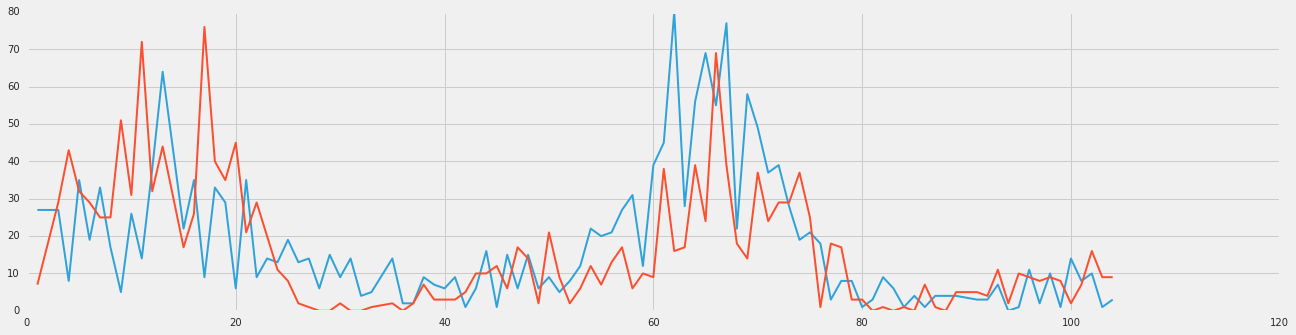

In [271]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5
with plot.style.context('fivethirtyeight'):
  plot.plot(realweekI, rubelINval, linewidth=2)
  plot.plot(realweekW, rubelWAval, linewidth=2)


Next we look at the two preceding years.   rubella0 above was modified to get 1970 to 71. and that data is stored in rubel0.   We go through the same normalization and concatinate the strings and plot the four year span below.

In [ ]:
%%sql --module rubella0
SELECT
  *
FROM (
  SELECT
    *,
    MIN(z___rank) OVER (PARTITION BY cdc_reports_epi_week) AS z___min_rank
  FROM (
    SELECT
      *,
      RANK() OVER (PARTITION BY cdc_reports_state ORDER BY cdc_reports_epi_week ) AS z___rank
    FROM (
      SELECT
        cdc_reports.epi_week AS cdc_reports_epi_week,
        cdc_reports.state AS cdc_reports_state,
        COALESCE(CAST(SUM((FLOAT(cdc_reports.cases))) AS FLOAT),0) AS cdc_reports_total_cases
      FROM
        [lookerdata:cdc.project_tycho_reports] AS cdc_reports
      WHERE
        (cdc_reports.disease = 'RUBELLA')
        AND (FLOOR(cdc_reports.epi_week/100) = 1970 OR FLOOR(cdc_reports.epi_week/100) = 1971)
        AND (cdc_reports.state = 'IN'
          OR cdc_reports.state = 'WA')
      GROUP EACH BY
        1,
        2) ww ) aa ) xx
WHERE
  z___min_rank <= 500
LIMIT
  30000

In [274]:
rubel0 = bq.Query(rubella0).to_dataframe() 

In [276]:
rubelIN0 = rubel0[rubel0['cdc_reports_state']=='IN'].sort_values(by=['cdc_reports_epi_week'])
rubelWA0 = rubel0[rubel0['cdc_reports_state']=='WA'].sort_values(by=['cdc_reports_epi_week'])
epiweekIN0 = rubelIN0['cdc_reports_epi_week']
epiweekWA0 = rubelWA0['cdc_reports_epi_week']
rubelINval0 = rubelIN0['cdc_reports_total_cases']
rubelWAval0 = rubelWA0['cdc_reports_total_cases']

In [278]:
realweekI0 = np.empty([len(epiweekIN0)])
realweekI0[:] = epiweekIN0[:]-197000
realweekI0[51:] = realweekI0[51:]-48
realweekW0= np.empty([len(epiweekWA0)])
realweekW0[:] = epiweekWA0[:]-197000
realweekW0[51:] = realweekW0[51:]-48


In [286]:
rwI = np.empty([len(realweekI)+len(realweekI0)])
k = len(realweekI0)
rwI[0:k] = realweekI0[:]
rwI[k:] = realweekI[:]+104
rvI = np.empty([len(rubelINval)+len(rubelINval0)])
rvI[0:k] = rubelINval0
rvI[k:] = rubelINval
rwW = np.empty([len(realweekW)+len(realweekW0)])
k = len(realweekW0)
rwW[0:k] = realweekW0[:]
rwW[k:] = realweekW[:]+104
rvW = np.empty([len(rubelWAval)+len(rubelWAval0)])
rvW[0:k] = rubelWAval0
rvW[k:] = rubelWAval


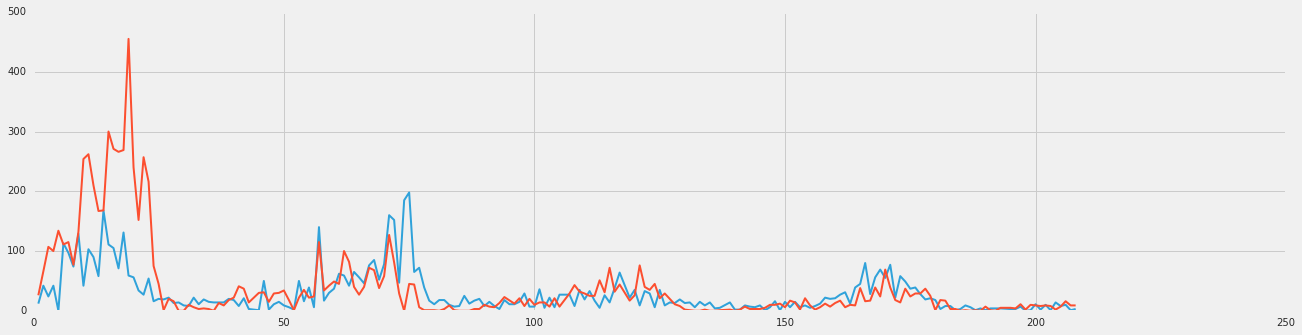

In [287]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5
with plot.style.context('fivethirtyeight'):
  plot.plot(rwI, rvI, linewidth=2)
  plot.plot(rwW, rvW, linewidth=2)
